<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/mlcomputerVS/blob/main/lab9_99101462.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

امتیازی اول

برای ساخت اند با پرسپترون کافی است ضریب ثابت هر لایه را برابر با

1-d

قرار دهیم که d برابر با بعد یا تعدا المان هایی است که میخواهیم اند بگیریمی در این صورت تنها زمانی ترکیب خطی آن ها مثبت میشود که همه عبارات 1 باشند و هیچ عبارت 0 ای نداشته باشیم و با یک عبارت سافت مکس که بزرگتر از یک ها را یک کند و از یک به پایین صفر

یا میتوانستیم 0 ها را به منفی یک مپ کنیم و ادامه بدهیم

In [9]:
w=[0,1,1,1,1]
b=1-len(w)
And=sum(w)+b
And

0

در عبارت بالا پون یک 0 داریم خروجی صفر شد

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os

In [3]:
import zipfile
zip_file_path = "/content/drive/MyDrive/FER-2013.zip"
extract_folder = "/content/extracted"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('FER_2013')

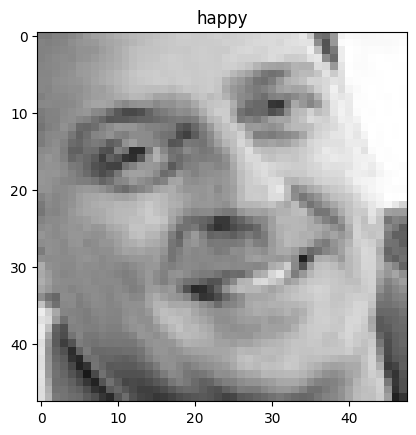

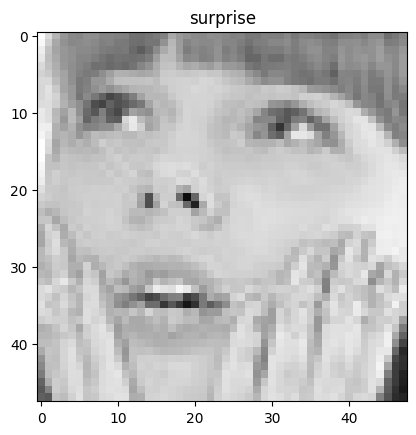

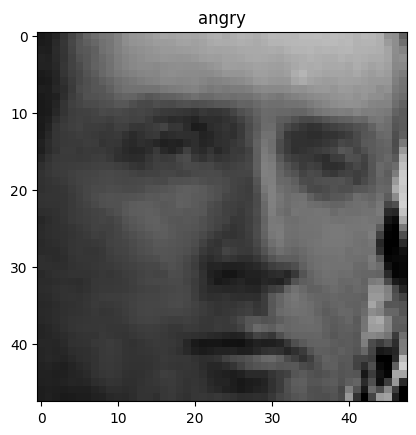

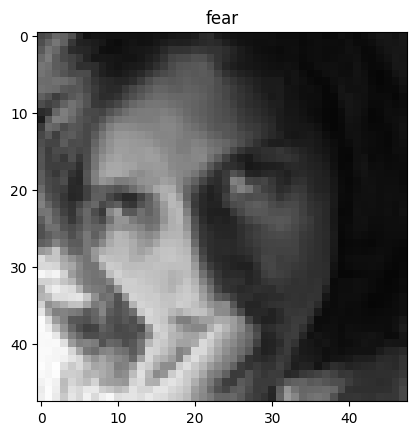

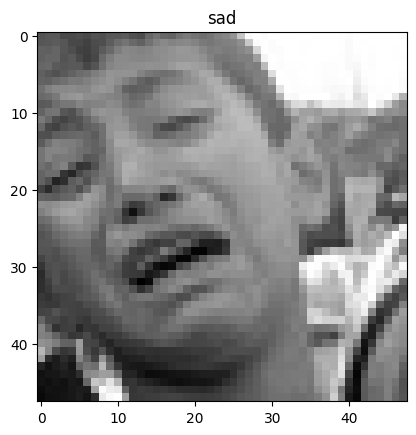

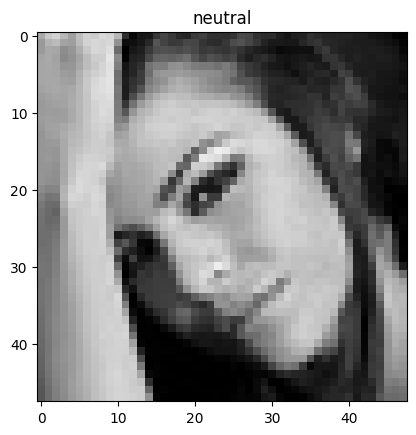

In [4]:
import os
import random
import matplotlib.pyplot as plt
import cv2

FER_path = "/content/FER_2013/FER-2013/train"
classes = [path for path in os.listdir(FER_path) if path != "disgust"]
for sub_class in classes:
    class_folder = os.path.join(FER_path, sub_class)
    class_imgs = [img for img in os.listdir(class_folder)]
    image = cv2.imread(os.path.join(class_folder, class_imgs[0]))
    plt.imshow(image, cmap='gray')
    plt.title(sub_class)
    plt.show()

در تصاویر بالا از هر کلاس یک عکس را نمایش دادیم

Epoch 1/50
884/884 [==============================] - 3s 3ms/step - loss: 3.9203 - accuracy: 0.2233 - val_loss: 10.0472 - val_accuracy: 0.1675
Epoch 2/50
884/884 [==============================] - 4s 4ms/step - loss: 3.5188 - accuracy: 0.2503 - val_loss: 6.0543 - val_accuracy: 0.1859
Epoch 3/50
884/884 [==============================] - 3s 3ms/step - loss: 3.4623 - accuracy: 0.2540 - val_loss: 3.4877 - val_accuracy: 0.1709
Epoch 4/50
884/884 [==============================] - 3s 3ms/step - loss: 3.4258 - accuracy: 0.2668 - val_loss: 3.6311 - val_accuracy: 0.1984
Epoch 5/50
884/884 [==============================] - 2s 2ms/step - loss: 3.3745 - accuracy: 0.2658 - val_loss: 4.0626 - val_accuracy: 0.2586
Epoch 6/50
884/884 [==============================] - 2s 3ms/step - loss: 3.2521 - accuracy: 0.2725 - val_loss: 2.8988 - val_accuracy: 0.1783
Epoch 7/50
884/884 [==============================] - 2s 3ms/step - loss: 3.2994 - accuracy: 0.2723 - val_loss: 2.5063 - val_accuracy: 0.2917
Epoch

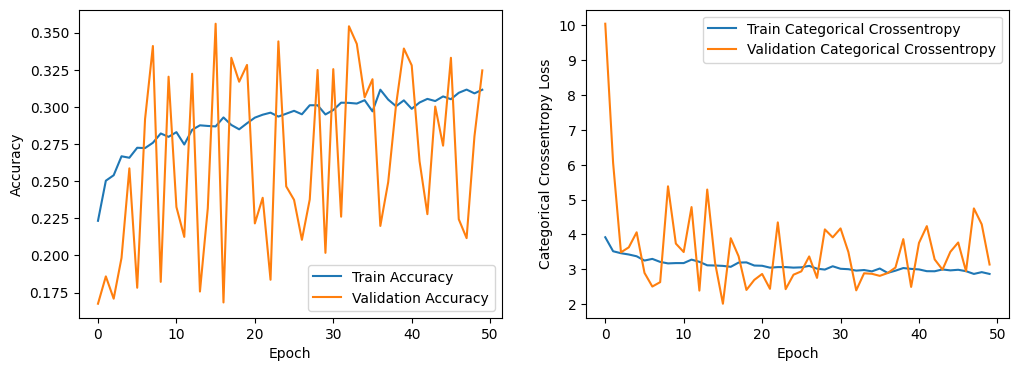

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
def load_dataset(folder_path):
    images, labels = [], []
    class_folders = sorted(os.listdir(folder_path))

    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(folder_path, class_folder)
        if class_folder !="disgust":
          for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            image = load_img(file_path)  # Adjust target size
            image_array = img_to_array(image) / 255.0  # Normalize pixel values
            images.append(image_array)
            labels.append(i)  # Use class index as label

    return np.array(images), np.array(labels)

# Load the dataset
X_train, y_train = load_dataset('/content/FER_2013/FER-2013/train')
X_val, y_val= load_dataset('/content/FER_2013/FER-2013/val')

y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)

# Creating the model
model = Sequential()
model.add(Flatten(input_shape=(48, 48, 3)))  # Adjust input shape according to your images
model.add(Dense(7, activation='softmax'))  # Assuming you have 5 classes

# Compiling the model with categorical crossentropy loss
learning_rate = 0.01
optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
epochs = 50
batch_size = 32

history = model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val_one_hot))

# Plotting the results
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Categorical Crossentropy')
plt.plot(history.history['val_loss'], label='Validation Categorical Crossentropy')
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.legend()

plt.show()

در قسمت بالا با استفاده از کتابخانه کراس مدلمان را ساختیم 50 ایپاک  
که میبینیم رفته رفته دقت مدل در هر ایپاک بیشتر میشود و از جایی به بعد تغییر نمیکند
البته پارامتر هایی هم که در نظر گرفتیم در دقت تاثییر دارد

111/111 [==============================] - 0s 2ms/step - loss: 3.1138 - accuracy: 0.3275
Test Accuracy: 0.3274837136268616
111/111 [==============================] - 0s 2ms/step


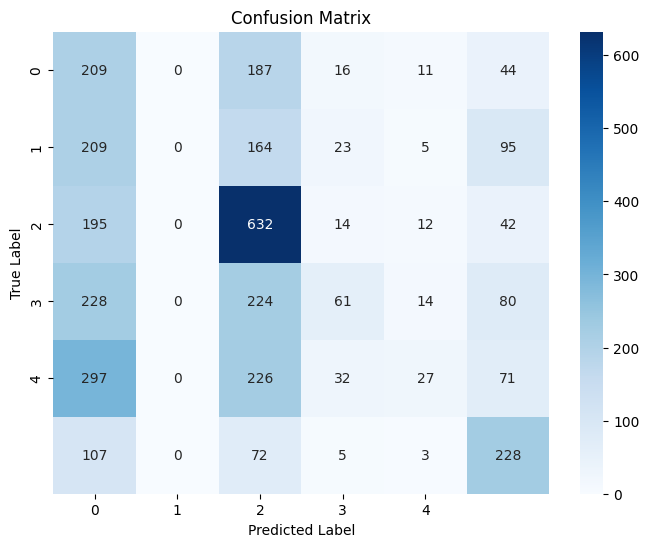

              precision    recall  f1-score   support

           0       0.17      0.45      0.24       467
           2       0.00      0.00      0.00       496
           3       0.42      0.71      0.53       895
           4       0.40      0.10      0.16       607
           5       0.38      0.04      0.07       653
           6       0.41      0.55      0.47       415

    accuracy                           0.33      3533
   macro avg       0.30      0.31      0.25      3533
weighted avg       0.32      0.33      0.26      3533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
X_test, y_test= load_dataset('/content/FER_2013/FER-2013/test')
y_test_one_hot = to_categorical(y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test Accuracy: {test_accuracy}')

# Get predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, y_pred))

در شکل بالا مدلی که در قسمت قبل درست کردیم را تست کردیم که میبینیم به خاطر ایپاک بندی دقت تست با دقت ترین تقریبا یکسان هستند

Epoch 1/50
884/884 [==============================] - 7s 7ms/step - loss: 1.7609 - accuracy: 0.2651 - val_loss: 1.7916 - val_accuracy: 0.2136
Epoch 2/50
884/884 [==============================] - 7s 8ms/step - loss: 1.6875 - accuracy: 0.3087 - val_loss: 1.6725 - val_accuracy: 0.3093
Epoch 3/50
884/884 [==============================] - 7s 7ms/step - loss: 1.6565 - accuracy: 0.3268 - val_loss: 1.6481 - val_accuracy: 0.3254
Epoch 4/50
884/884 [==============================] - 6s 7ms/step - loss: 1.6276 - accuracy: 0.3398 - val_loss: 1.6797 - val_accuracy: 0.3144
Epoch 5/50
884/884 [==============================] - 7s 8ms/step - loss: 1.6103 - accuracy: 0.3545 - val_loss: 1.5866 - val_accuracy: 0.3630
Epoch 6/50
884/884 [==============================] - 6s 7ms/step - loss: 1.5938 - accuracy: 0.3606 - val_loss: 1.5807 - val_accuracy: 0.3778
Epoch 7/50
884/884 [==============================] - 8s 9ms/step - loss: 1.5791 - accuracy: 0.3682 - val_loss: 1.5955 - val_accuracy: 0.3613
Epoch 

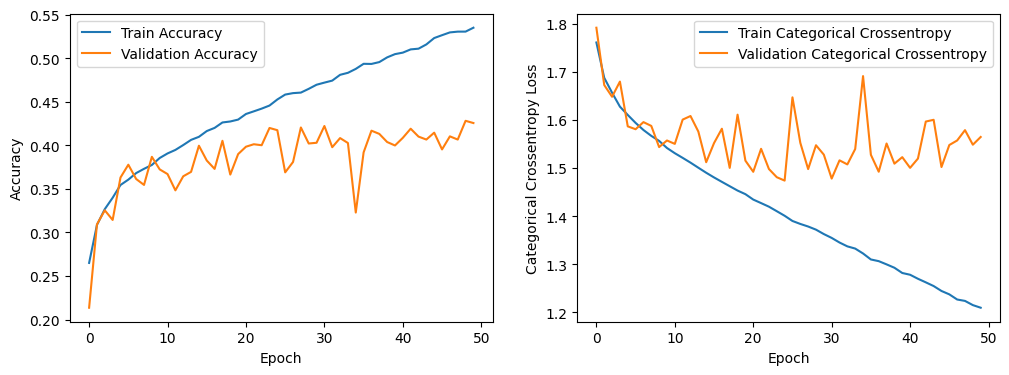

In [27]:
model = Sequential()
model.add(Flatten(input_shape=(48, 48, 3)))  # Adjust input shape according to your images
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))  # Assuming you have 5 classes
from keras.optimizers import SGD
# Compiling the model with categorical crossentropy loss
learning_rate = 0.01
optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
epochs = 30
batch_size = 32

history = model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val_one_hot))

# Plotting the results
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Categorical Crossentropy')
plt.plot(history.history['val_loss'], label='Validation Categorical Crossentropy')
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.legend()

plt.show()

در شکل بالا که 4 لایه پنهان قرار دادیم دیدیم که دقت به یکباره نزدیک به 20 درصد افزایش یافت یعنی به بالای 50 درصد رسیده است
این دقت ترین است

111/111 [==============================] - 0s 3ms/step - loss: 1.6013 - accuracy: 0.4149
Test Accuracy: 0.4149447977542877
111/111 [==============================] - 0s 3ms/step


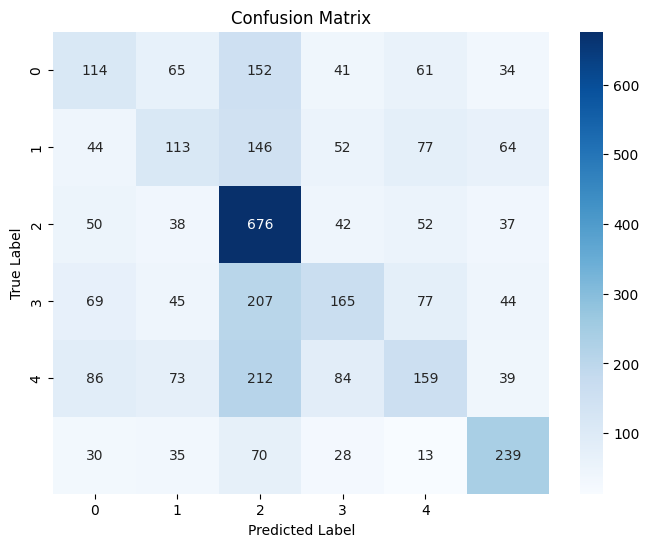

              precision    recall  f1-score   support

           0       0.29      0.24      0.27       467
           2       0.31      0.23      0.26       496
           3       0.46      0.76      0.57       895
           4       0.40      0.27      0.32       607
           5       0.36      0.24      0.29       653
           6       0.52      0.58      0.55       415

    accuracy                           0.41      3533
   macro avg       0.39      0.39      0.38      3533
weighted avg       0.40      0.41      0.39      3533



In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test Accuracy: {test_accuracy}')

# Get predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, y_pred))

دقت تست نیز نسبت به حالت قبل بهتر شده است یعنی از 30 به 40 درصد رسیده ولی با دقت ترین تفاوتی دارد و آن هم بخاطر اور فیت شدن است که لایه ها را زیاد کردیم و اور فیت رخ میدهد

In [8]:


# Example hyperparameters
learning_rates = [0.3, 0.2, 0.1]
batch_sizes = [128, 32, 64]
epochs_values = [10, 30,20]
for batch_size in batch_sizes:
            # Build and compile the model with current hyperparameters
            model = Sequential()
            model.add(Flatten(input_shape=(48, 48, 3)))
            model.add(Dense(128, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(32, activation='relu'))
            model.add(Dense(16, activation='relu'))
            model.add(Dense(7, activation='softmax'))
            model.compile(optimizer=Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

            # Train the model
            history = model.fit(X_train, y_train_one_hot, epochs=30, batch_size=batch_size,
                    validation_data=(X_val, y_val_one_hot))

            # Evaluate the model on the validation set
            val_loss, val_accuracy = model.evaluate(X_val,  y_val_one_hot)

            # Print or store results for analysis
            print(f'Learning Rate: {0.1}, Batch Size: {batch_size}, Epochs: {30}')
            print(f'Validation Accuracy: {val_accuracy}, Validation Loss: {val_loss}\n')

for lr in learning_rates:
              # Build and compile the model with current hyperparameters
            model = Sequential()
            model.add(Flatten(input_shape=(48, 48, 3)))
            model.add(Dense(128, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(32, activation='relu'))
            model.add(Dense(16, activation='relu'))
            model.add(Dense(7, activation='softmax'))
            model.compile(optimizer=Adam(lr), loss='categorical_crossentropy', metrics=['accuracy'])

            # Train the model
            history = model.fit(X_train, y_train_one_hot, epochs=30, batch_size=64,
                    validation_data=(X_val, y_val_one_hot))

            # Evaluate the model on the validation set
            val_loss, val_accuracy = model.evaluate(X_val,  y_val_one_hot)

            # Print or store results for analysis
            print(f'Learning Rate: {lr}, Batch Size: {batch_size}, Epochs: {30}')
            print(f'Validation Accuracy: {val_accuracy}, Validation Loss: {val_loss}\n')

for epochs_value in epochs_values:

            # Build and compile the model with current hyperparameters
            model = Sequential()
            model.add(Flatten(input_shape=(48, 48, 3)))
            model.add(Dense(128, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(32, activation='relu'))
            model.add(Dense(16, activation='relu'))
            model.add(Dense(7, activation='softmax'))
            model.compile(optimizer=Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

            # Train the model
            history = model.fit(X_train, y_train_one_hot, epochs=epochs_value, batch_size=64,
                    validation_data=(X_val, y_val_one_hot))

            # Evaluate the model on the validation set
            val_loss, val_accuracy = model.evaluate(X_val,  y_val_one_hot)

            # Print or store results for analysis
            print(f'Learning Rate: {0.1}, Batch Size: {batch_size}, Epochs: {epochs_value}')
            print(f'Validation Accuracy: {val_accuracy}, Validation Loss: {val_loss}\n')



Epoch 1/30
221/221 [==============================] - 8s 30ms/step - loss: 27.0076 - accuracy: 0.2500 - val_loss: 1.7658 - val_accuracy: 0.2487
Epoch 2/30
221/221 [==============================] - 7s 31ms/step - loss: 1.7614 - accuracy: 0.2552 - val_loss: 1.7663 - val_accuracy: 0.2487
Epoch 3/30
221/221 [==============================] - 5s 23ms/step - loss: 1.7613 - accuracy: 0.2552 - val_loss: 1.7667 - val_accuracy: 0.2487
Epoch 4/30
221/221 [==============================] - 6s 25ms/step - loss: 1.7614 - accuracy: 0.2552 - val_loss: 1.7664 - val_accuracy: 0.2487
Epoch 5/30
221/221 [==============================] - 6s 28ms/step - loss: 1.7607 - accuracy: 0.2552 - val_loss: 1.7646 - val_accuracy: 0.2487
Epoch 6/30
221/221 [==============================] - 6s 28ms/step - loss: 1.7616 - accuracy: 0.2552 - val_loss: 1.7665 - val_accuracy: 0.2487
Epoch 7/30
221/221 [==============================] - 8s 37ms/step - loss: 1.7620 - accuracy: 0.2552 - val_loss: 1.7640 - val_accuracy: 0.248

در شکل های بالا هرچه تعداد بچ هارا زیاد تر کرده ایم زماان انجام ایپاک بیشتر شده چون دیتا ها حجیم تر تقسیم شده اند ولی دقت با فیکس بودن پارامتر های دیگر فرقی نکرده است و با تغییر ایپاک ها فقط دقت تا یک جایی بیشتر میشود ولی از جایی به بعد دیگر همگرا میشود و تغییری در دقت نداریم
لرنینگ ریت هم هرچه بزرگتر بوده ما سریع تر به مقدار همگرایی خود رسیده ایم و هرچه کوچکتر باشد دیرتر همگرا میشویم.

In [11]:
from keras.optimizers import SGD, RMSprop,Adam
model = Sequential()
model.add(Flatten(input_shape=(48, 48, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer=RMSprop(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=30, batch_size=64,
validation_data=(X_val, y_val_one_hot))

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val,  y_val_one_hot)

# Print or store results for analysis
print('RMSprop')
print(f'Learning Rate: {0.1}, Batch Size: {64}, Epochs: {30}')
print(f'Validation Accuracy: {val_accuracy}, Validation Loss: {val_loss}\n')

model = Sequential()
model.add(Flatten(input_shape=(48, 48, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer=SGD(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=30, batch_size=64,
validation_data=(X_val, y_val_one_hot))

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val,  y_val_one_hot)

# Print or store results for analysis
print('SGD')
print(f'Learning Rate: {0.1}, Batch Size: {64}, Epochs: {30}')
print(f'Validation Accuracy: {val_accuracy}, Validation Loss: {val_loss}\n')

Epoch 1/30
442/442 [==============================] - 9s 19ms/step - loss: 865.1357 - accuracy: 0.2484 - val_loss: 1.7790 - val_accuracy: 0.1771
Epoch 2/30
442/442 [==============================] - 6s 14ms/step - loss: 1.7650 - accuracy: 0.2513 - val_loss: 1.7710 - val_accuracy: 0.2487
Epoch 3/30
442/442 [==============================] - 8s 18ms/step - loss: 1.7654 - accuracy: 0.2530 - val_loss: 1.7710 - val_accuracy: 0.2487
Epoch 4/30
442/442 [==============================] - 6s 15ms/step - loss: 1.7646 - accuracy: 0.2525 - val_loss: 1.7657 - val_accuracy: 0.2487
Epoch 5/30
442/442 [==============================] - 9s 20ms/step - loss: 1.7656 - accuracy: 0.2525 - val_loss: 1.7703 - val_accuracy: 0.2487
Epoch 6/30
442/442 [==============================] - 7s 15ms/step - loss: 1.7649 - accuracy: 0.2524 - val_loss: 1.7703 - val_accuracy: 0.2487
Epoch 7/30
442/442 [==============================] - 8s 18ms/step - loss: 1.7649 - accuracy: 0.2525 - val_loss: 1.7740 - val_accuracy: 0.24

بین سه الگوریتم بهینه سازی SGD از بقیه دقت بهتری نتیجه داد یعنی دقت 40 درصد با ایپاک 30 و سایز بچ 64 و لرنینگ ریت 0.1

Training with batch size: 32, epochs: 2
Epoch 1/2
884/884 [==============================] - ETA: 0s - loss: 0.4078 - accuracy: 0.2453
Epoch 1: val_accuracy improved from -inf to 0.24873, saving model to best_model.h5
884/884 [==============================] - 118s 132ms/step - loss: 0.4078 - accuracy: 0.2453 - val_loss: 0.3856 - val_accuracy: 0.2487
Epoch 2/2


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


884/884 [==============================] - ETA: 0s - loss: 0.3844 - accuracy: 0.2552
Epoch 2: val_accuracy did not improve from 0.24873
884/884 [==============================] - 130s 147ms/step - loss: 0.3844 - accuracy: 0.2552 - val_loss: 0.3852 - val_accuracy: 0.2487


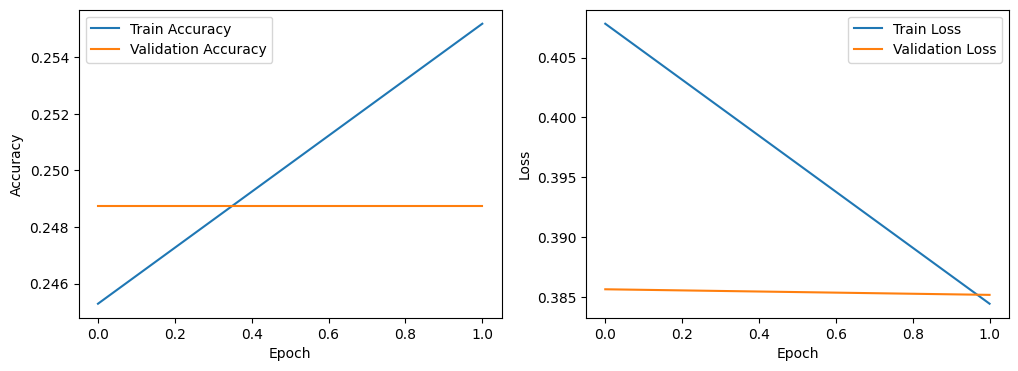

111/111 [==============================] - 3s 31ms/step - loss: 0.3848 - accuracy: 0.2533
Test Accuracy: 0.25332579016685486
111/111 [==============================] - 3s 30ms/step


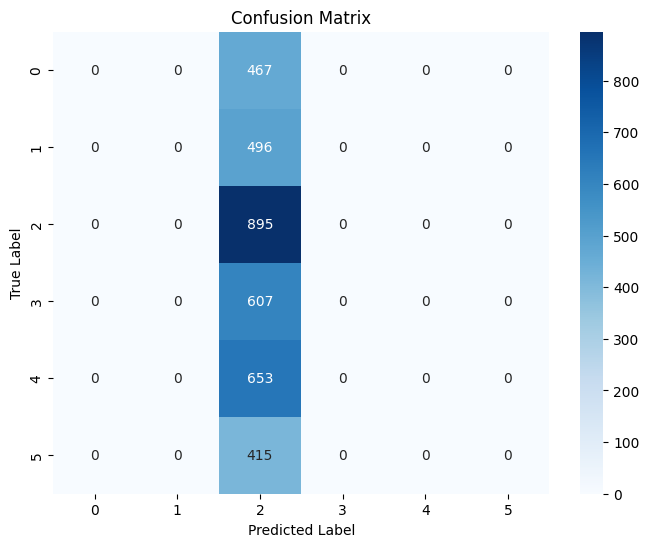

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       467
           2       0.00      0.00      0.00       496
           3       0.25      1.00      0.40       895
           4       0.00      0.00      0.00       607
           5       0.00      0.00      0.00       653
           6       0.00      0.00      0.00       415

    accuracy                           0.25      3533
   macro avg       0.04      0.17      0.07      3533
weighted avg       0.06      0.25      0.10      3533

Training with batch size: 32, epochs: 3
Epoch 1/3
884/884 [==============================] - ETA: 0s - loss: 0.3838 - accuracy: 0.2555
Epoch 1: val_accuracy improved from -inf to 0.24901, saving model to best_model.h5
884/884 [==============================] - 118s 133ms/step - loss: 0.3838 - accuracy: 0.2555 - val_loss: 0.3844 - val_accuracy: 0.2490
Epoch 2/3


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


884/884 [==============================] - ETA: 0s - loss: 0.3832 - accuracy: 0.2561
Epoch 2: val_accuracy improved from 0.24901 to 0.24986, saving model to best_model.h5
884/884 [==============================] - 117s 132ms/step - loss: 0.3832 - accuracy: 0.2561 - val_loss: 0.3837 - val_accuracy: 0.2499
Epoch 3/3
884/884 [==============================] - ETA: 0s - loss: 0.3826 - accuracy: 0.2558
Epoch 3: val_accuracy improved from 0.24986 to 0.25099, saving model to best_model.h5
884/884 [==============================] - 114s 129ms/step - loss: 0.3826 - accuracy: 0.2558 - val_loss: 0.3833 - val_accuracy: 0.2510


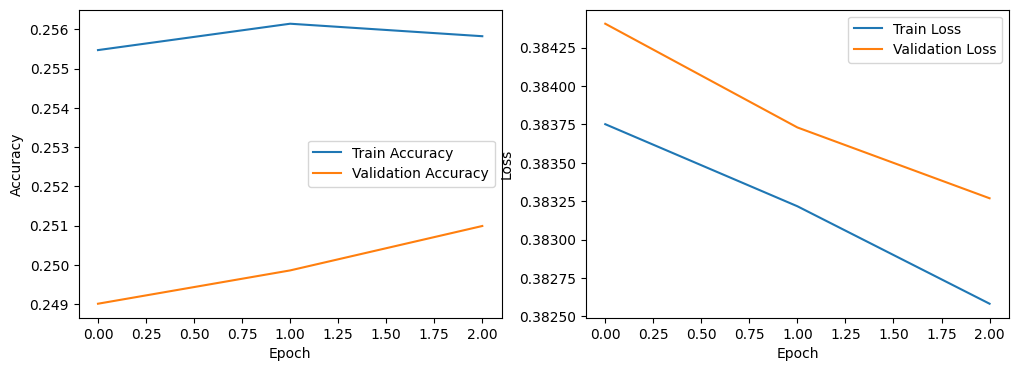

111/111 [==============================] - 3s 30ms/step - loss: 0.3823 - accuracy: 0.2607
Test Accuracy: 0.2606849670410156
111/111 [==============================] - 4s 33ms/step


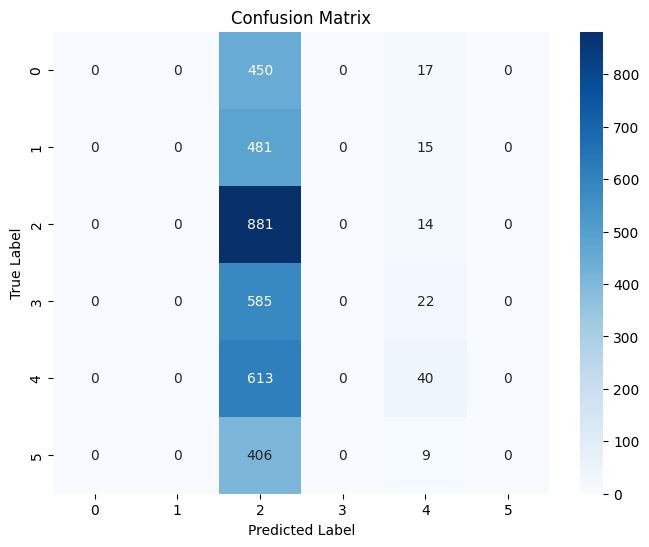

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       467
           2       0.00      0.00      0.00       496
           3       0.26      0.98      0.41       895
           4       0.00      0.00      0.00       607
           5       0.34      0.06      0.10       653
           6       0.00      0.00      0.00       415

    accuracy                           0.26      3533
   macro avg       0.10      0.17      0.09      3533
weighted avg       0.13      0.26      0.12      3533

Training with batch size: 64, epochs: 2
Epoch 1/2
442/442 [==============================] - ETA: 0s - loss: 0.3819 - accuracy: 0.2570
Epoch 1: val_accuracy improved from -inf to 0.24958, saving model to best_model.h5
442/442 [==============================] - 115s 261ms/step - loss: 0.3819 - accuracy: 0.2570 - val_loss: 0.3829 - val_accuracy: 0.2496
Epoch 2/2


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


442/442 [==============================] - ETA: 0s - loss: 0.3817 - accuracy: 0.2571
Epoch 2: val_accuracy improved from 0.24958 to 0.25099, saving model to best_model.h5
442/442 [==============================] - 119s 269ms/step - loss: 0.3817 - accuracy: 0.2571 - val_loss: 0.3826 - val_accuracy: 0.2510


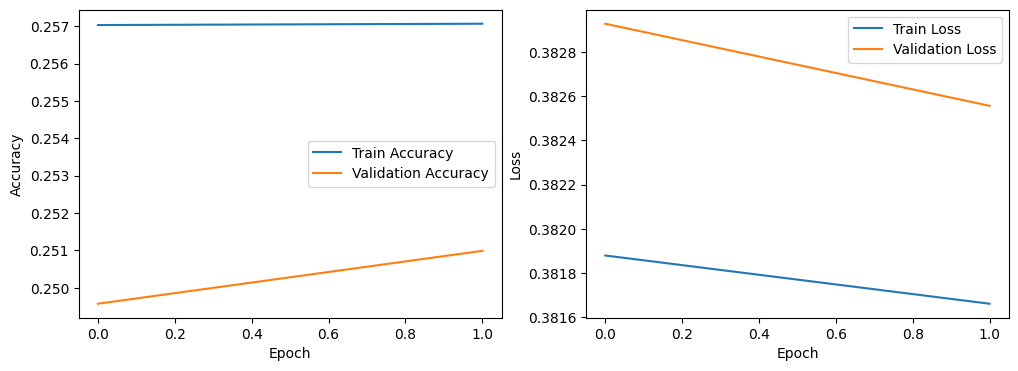

111/111 [==============================] - 4s 32ms/step - loss: 0.3821 - accuracy: 0.2593
Test Accuracy: 0.25926974415779114
111/111 [==============================] - 5s 47ms/step


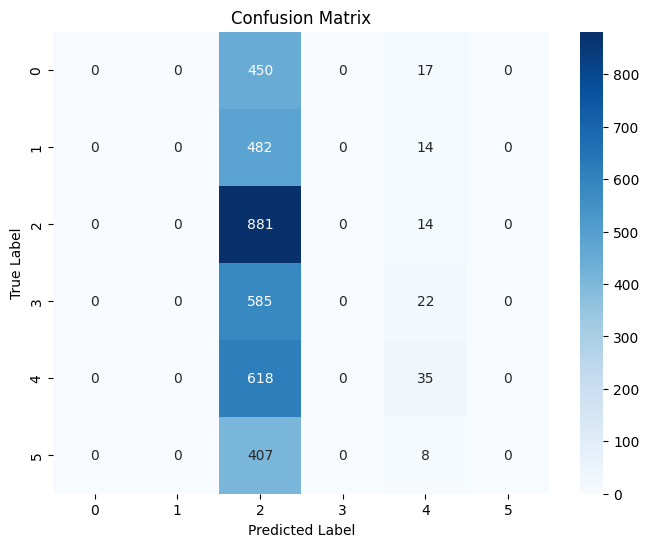

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       467
           2       0.00      0.00      0.00       496
           3       0.26      0.98      0.41       895
           4       0.00      0.00      0.00       607
           5       0.32      0.05      0.09       653
           6       0.00      0.00      0.00       415

    accuracy                           0.26      3533
   macro avg       0.10      0.17      0.08      3533
weighted avg       0.12      0.26      0.12      3533

Training with batch size: 64, epochs: 3
Epoch 1/3
442/442 [==============================] - ETA: 0s - loss: 0.3813 - accuracy: 0.2587
Epoch 1: val_accuracy improved from -inf to 0.25184, saving model to best_model.h5
442/442 [==============================] - 112s 254ms/step - loss: 0.3813 - accuracy: 0.2587 - val_loss: 0.3820 - val_accuracy: 0.2518
Epoch 2/3


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


442/442 [==============================] - ETA: 0s - loss: 0.3811 - accuracy: 0.2589
Epoch 2: val_accuracy did not improve from 0.25184
442/442 [==============================] - 116s 264ms/step - loss: 0.3811 - accuracy: 0.2589 - val_loss: 0.3822 - val_accuracy: 0.2496
Epoch 3/3
442/442 [==============================] - ETA: 0s - loss: 0.3808 - accuracy: 0.2582
Epoch 3: val_accuracy improved from 0.25184 to 0.26599, saving model to best_model.h5
442/442 [==============================] - 113s 257ms/step - loss: 0.3808 - accuracy: 0.2582 - val_loss: 0.3829 - val_accuracy: 0.2660


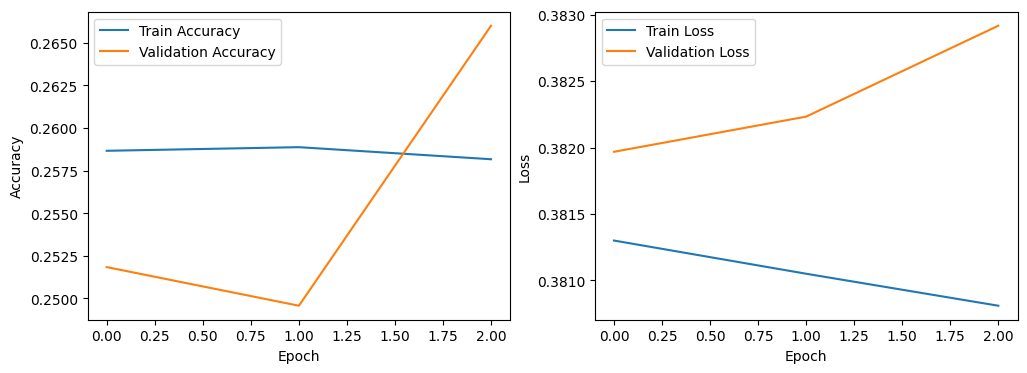

111/111 [==============================] - 5s 42ms/step - loss: 0.3818 - accuracy: 0.2649
Test Accuracy: 0.2649306654930115
111/111 [==============================] - 4s 36ms/step


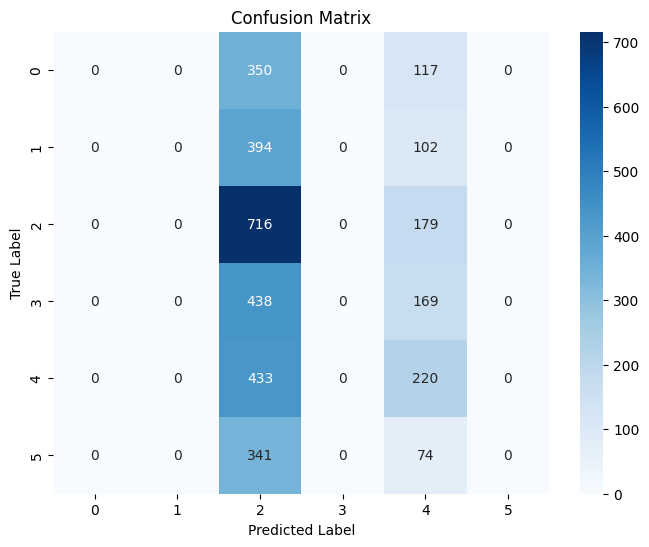

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       467
           2       0.00      0.00      0.00       496
           3       0.27      0.80      0.40       895
           4       0.00      0.00      0.00       607
           5       0.26      0.34      0.29       653
           6       0.00      0.00      0.00       415

    accuracy                           0.26      3533
   macro avg       0.09      0.19      0.12      3533
weighted avg       0.12      0.26      0.16      3533

Best model selected based on highest test accuracy.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assuming you have the following variables: X_train, y_train, X_val, y_val, X_test, y_test

# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, 3, activation='relu', input_shape=(48, 48,3)))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D(2,2))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='softmax'))
model.add(Dense(7, activation='sigmoid'))  # Binary classification

# Compile the model
learning_rate = 0.1
optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Set hyperparameters
batch_size_list = [32, 64]
epochs_list = [2, 3]
best_model = None
best_accuracy = 0.0

# Train the model for different hyperparameter settings
for batch_size in batch_size_list:
    for epochs in epochs_list:
        print(f"Training with batch size: {batch_size}, epochs: {epochs}")

        # Use ModelCheckpoint to save the best model based on validation accuracy
        checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

        # Train the model
        history =model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size,
        validation_data=(X_val, y_val_one_hot),callbacks=[checkpoint])

        # Plot training history
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
        print(f'Test Accuracy: {test_accuracy}')

        # Get predictions
        y_pred = np.argmax(model.predict(X_test), axis=1)

        # Create confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Display confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Display classification report
        print(classification_report(y_test, y_pred))

        # Check if the current model is the best
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model

# Use the best model for further analysis or deployment
print("Best model selected based on highest test accuracy.")


Training with batch size: 64, epochs: 5
Epoch 1/5
442/442 [==============================] - ETA: 0s - loss: 1.7899 - accuracy: 0.2538
Epoch 1: val_accuracy improved from -inf to 0.24873, saving model to best_model.h5
442/442 [==============================] - 115s 257ms/step - loss: 1.7899 - accuracy: 0.2538 - val_loss: 1.7664 - val_accuracy: 0.2487
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


442/442 [==============================] - ETA: 0s - loss: 1.7601 - accuracy: 0.2552
Epoch 2: val_accuracy did not improve from 0.24873
442/442 [==============================] - 101s 228ms/step - loss: 1.7601 - accuracy: 0.2552 - val_loss: 1.7645 - val_accuracy: 0.2487
Epoch 3/5
442/442 [==============================] - ETA: 0s - loss: 1.7600 - accuracy: 0.2552
Epoch 3: val_accuracy did not improve from 0.24873
442/442 [==============================] - 102s 229ms/step - loss: 1.7600 - accuracy: 0.2552 - val_loss: 1.7660 - val_accuracy: 0.2487
Epoch 4/5
442/442 [==============================] - ETA: 0s - loss: 1.7593 - accuracy: 0.2552
Epoch 4: val_accuracy did not improve from 0.24873
442/442 [==============================] - 111s 251ms/step - loss: 1.7593 - accuracy: 0.2552 - val_loss: 1.7655 - val_accuracy: 0.2487
Epoch 5/5
442/442 [==============================] - ETA: 0s - loss: 1.7596 - accuracy: 0.2552
Epoch 5: val_accuracy did not improve from 0.24873
442/442 [============

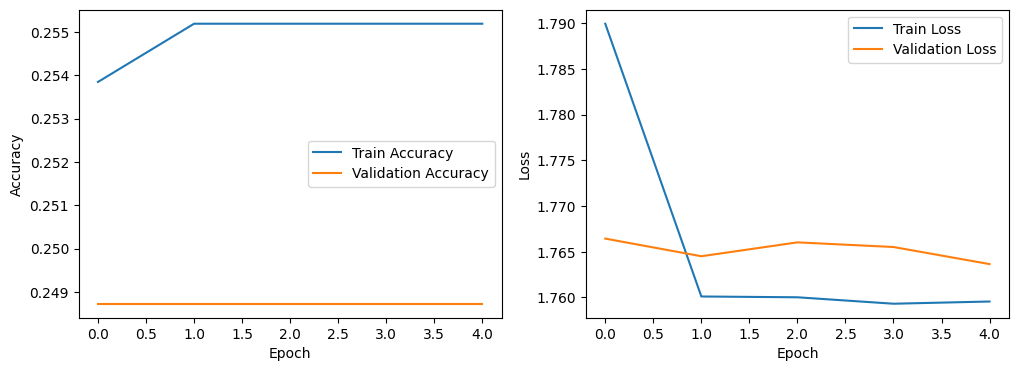

111/111 [==============================] - 4s 37ms/step - loss: 1.7599 - accuracy: 0.2533
Test Accuracy: 0.25332579016685486
111/111 [==============================] - 3s 27ms/step


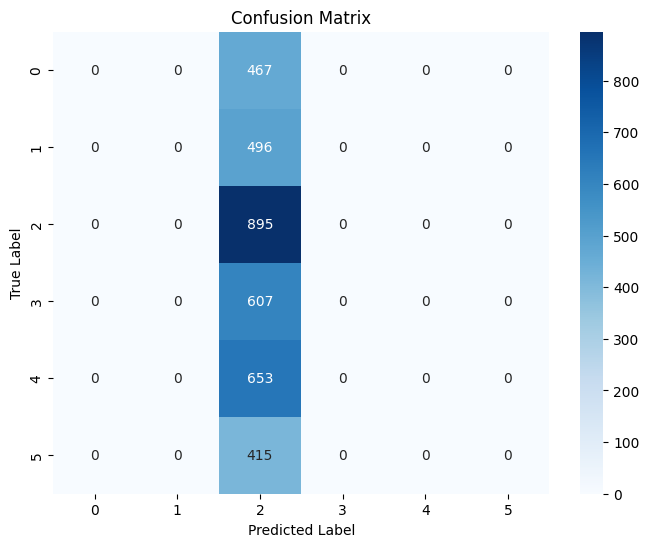

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       467
           2       0.00      0.00      0.00       496
           3       0.25      1.00      0.40       895
           4       0.00      0.00      0.00       607
           5       0.00      0.00      0.00       653
           6       0.00      0.00      0.00       415

    accuracy                           0.25      3533
   macro avg       0.04      0.17      0.07      3533
weighted avg       0.06      0.25      0.10      3533

Training with batch size: 64, epochs: 6
Epoch 1/6
442/442 [==============================] - ETA: 0s - loss: 1.7684 - accuracy: 0.2522
Epoch 1: val_accuracy improved from -inf to 0.24873, saving model to best_model.h5
442/442 [==============================] - 106s 238ms/step - loss: 1.7684 - accuracy: 0.2522 - val_loss: 1.7653 - val_accuracy: 0.2487
Epoch 2/6


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


442/442 [==============================] - ETA: 0s - loss: 1.7614 - accuracy: 0.2547
Epoch 2: val_accuracy did not improve from 0.24873
442/442 [==============================] - 100s 226ms/step - loss: 1.7614 - accuracy: 0.2547 - val_loss: 1.7643 - val_accuracy: 0.2487
Epoch 3/6
442/442 [==============================] - ETA: 0s - loss: 1.7602 - accuracy: 0.2552
Epoch 3: val_accuracy did not improve from 0.24873
442/442 [==============================] - 102s 231ms/step - loss: 1.7602 - accuracy: 0.2552 - val_loss: 1.7652 - val_accuracy: 0.2487
Epoch 4/6
442/442 [==============================] - ETA: 0s - loss: 1.7599 - accuracy: 0.2552
Epoch 4: val_accuracy did not improve from 0.24873
442/442 [==============================] - 104s 236ms/step - loss: 1.7599 - accuracy: 0.2552 - val_loss: 1.7648 - val_accuracy: 0.2487
Epoch 5/6
442/442 [==============================] - ETA: 0s - loss: 1.7595 - accuracy: 0.2552
Epoch 5: val_accuracy did not improve from 0.24873
442/442 [============

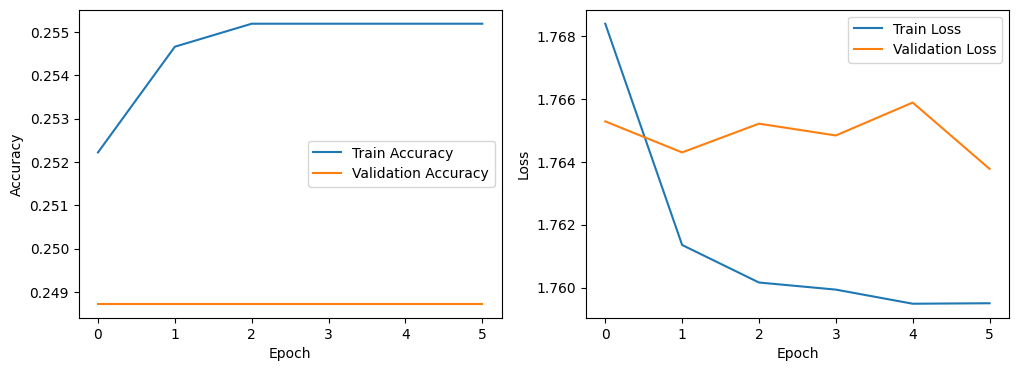

111/111 [==============================] - 3s 30ms/step - loss: 1.7592 - accuracy: 0.2533
Test Accuracy: 0.25332579016685486
111/111 [==============================] - 5s 41ms/step


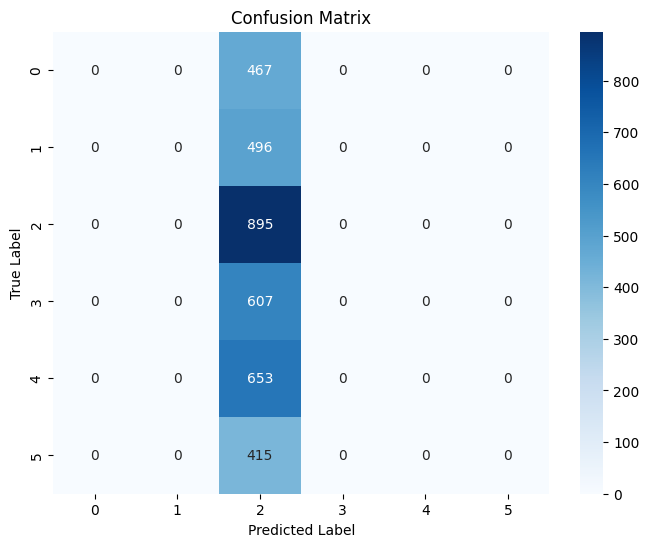

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       467
           2       0.00      0.00      0.00       496
           3       0.25      1.00      0.40       895
           4       0.00      0.00      0.00       607
           5       0.00      0.00      0.00       653
           6       0.00      0.00      0.00       415

    accuracy                           0.25      3533
   macro avg       0.04      0.17      0.07      3533
weighted avg       0.06      0.25      0.10      3533

Training with batch size: 128, epochs: 5
Epoch 1/5
221/221 [==============================] - ETA: 0s - loss: 1.8037 - accuracy: 0.2541
Epoch 1: val_accuracy improved from -inf to 0.24873, saving model to best_model.h5
221/221 [==============================] - 105s 469ms/step - loss: 1.8037 - accuracy: 0.2541 - val_loss: 1.7669 - val_accuracy: 0.2487
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


221/221 [==============================] - ETA: 0s - loss: 1.7606 - accuracy: 0.2552
Epoch 2: val_accuracy did not improve from 0.24873
221/221 [==============================] - 102s 462ms/step - loss: 1.7606 - accuracy: 0.2552 - val_loss: 1.7651 - val_accuracy: 0.2487
Epoch 3/5
221/221 [==============================] - ETA: 0s - loss: 1.7603 - accuracy: 0.2552
Epoch 3: val_accuracy did not improve from 0.24873
221/221 [==============================] - 103s 465ms/step - loss: 1.7603 - accuracy: 0.2552 - val_loss: 1.7647 - val_accuracy: 0.2487
Epoch 4/5
221/221 [==============================] - ETA: 0s - loss: 1.7598 - accuracy: 0.2552
Epoch 4: val_accuracy did not improve from 0.24873
221/221 [==============================] - 106s 481ms/step - loss: 1.7598 - accuracy: 0.2552 - val_loss: 1.7647 - val_accuracy: 0.2487
Epoch 5/5
221/221 [==============================] - ETA: 0s - loss: 1.7596 - accuracy: 0.2552
Epoch 5: val_accuracy did not improve from 0.24873
221/221 [============

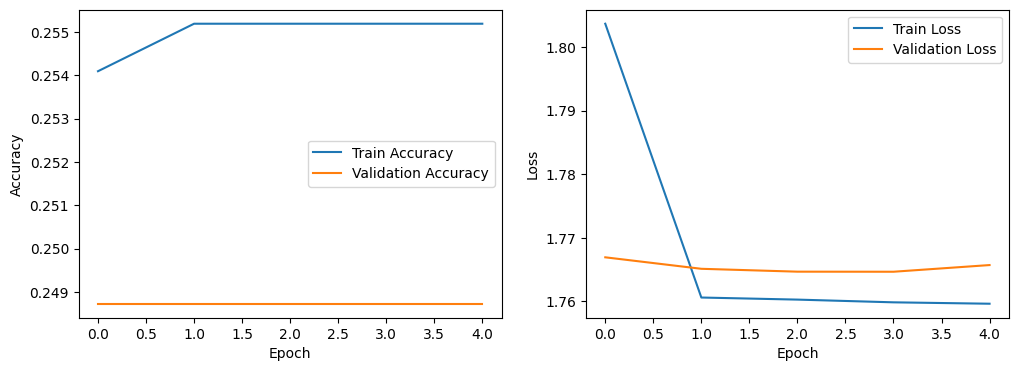

111/111 [==============================] - 5s 42ms/step - loss: 1.7599 - accuracy: 0.2533
Test Accuracy: 0.25332579016685486
111/111 [==============================] - 3s 30ms/step


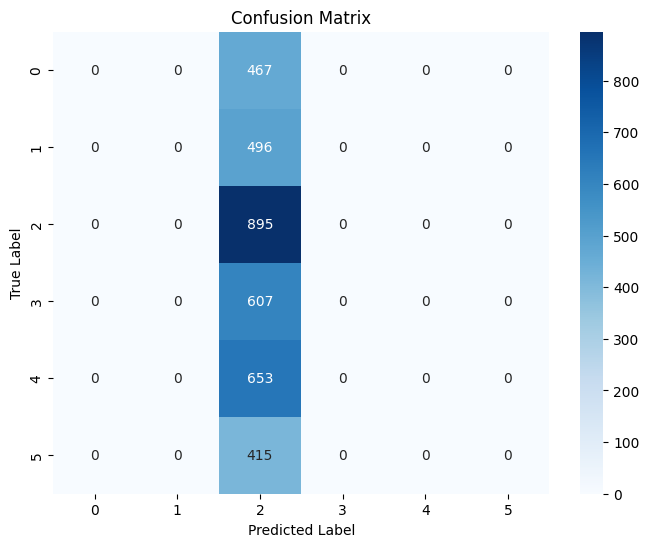

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       467
           2       0.00      0.00      0.00       496
           3       0.25      1.00      0.40       895
           4       0.00      0.00      0.00       607
           5       0.00      0.00      0.00       653
           6       0.00      0.00      0.00       415

    accuracy                           0.25      3533
   macro avg       0.04      0.17      0.07      3533
weighted avg       0.06      0.25      0.10      3533

Training with batch size: 128, epochs: 6
Epoch 1/6
221/221 [==============================] - ETA: 0s - loss: 1.8271 - accuracy: 0.2503
Epoch 1: val_accuracy improved from -inf to 0.24873, saving model to best_model.h5
221/221 [==============================] - 106s 473ms/step - loss: 1.8271 - accuracy: 0.2503 - val_loss: 1.7664 - val_accuracy: 0.2487
Epoch 2/6


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


221/221 [==============================] - ETA: 0s - loss: 1.7612 - accuracy: 0.2552
Epoch 2: val_accuracy did not improve from 0.24873
221/221 [==============================] - 105s 477ms/step - loss: 1.7612 - accuracy: 0.2552 - val_loss: 1.7637 - val_accuracy: 0.2487
Epoch 3/6
221/221 [==============================] - ETA: 0s - loss: 1.7600 - accuracy: 0.2552
Epoch 3: val_accuracy did not improve from 0.24873
221/221 [==============================] - 105s 474ms/step - loss: 1.7600 - accuracy: 0.2552 - val_loss: 1.7631 - val_accuracy: 0.2487
Epoch 4/6
221/221 [==============================] - ETA: 0s - loss: 1.7600 - accuracy: 0.2552
Epoch 4: val_accuracy did not improve from 0.24873
221/221 [==============================] - 104s 471ms/step - loss: 1.7600 - accuracy: 0.2552 - val_loss: 1.7641 - val_accuracy: 0.2487
Epoch 5/6
221/221 [==============================] - ETA: 0s - loss: 1.7594 - accuracy: 0.2552
Epoch 5: val_accuracy did not improve from 0.24873
221/221 [============

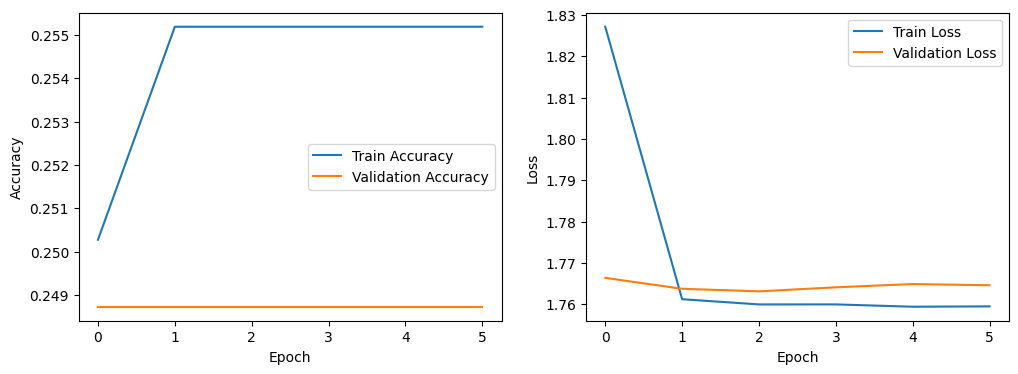

111/111 [==============================] - 4s 31ms/step - loss: 1.7614 - accuracy: 0.2533
Test Accuracy: 0.25332579016685486
111/111 [==============================] - 3s 29ms/step


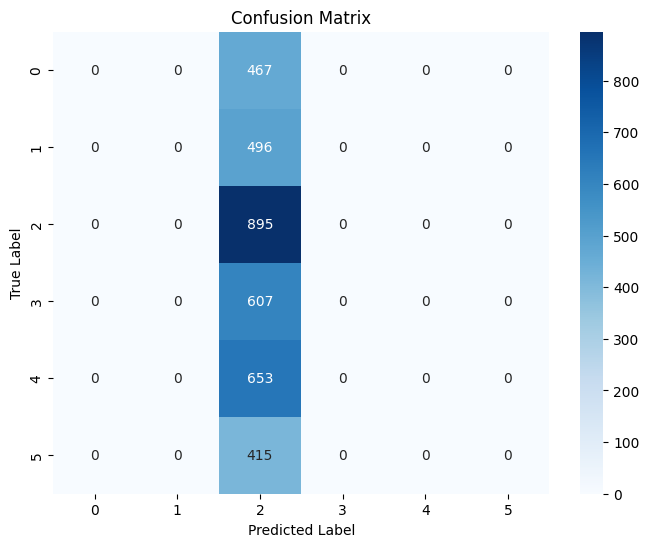

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       467
           2       0.00      0.00      0.00       496
           3       0.25      1.00      0.40       895
           4       0.00      0.00      0.00       607
           5       0.00      0.00      0.00       653
           6       0.00      0.00      0.00       415

    accuracy                           0.25      3533
   macro avg       0.04      0.17      0.07      3533
weighted avg       0.06      0.25      0.10      3533

Best model selected based on highest test accuracy.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assuming you have the following variables: X_train, y_train, X_val, y_val, X_test, y_test

# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, 3, activation='relu', input_shape=(48, 48,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D(2,2))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='softmax'))
model.add(Dense(7, activation='sigmoid'))  # Binary classification

# Compile the model
learning_rate = 0.01
optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# Set hyperparameters
batch_size_list = [64,128]
epochs_list = [5,6]
best_model = None
best_accuracy = 0.0

# Train the model for different hyperparameter settings
for batch_size in batch_size_list:
    for epochs in epochs_list:
        model = Sequential()

        # Convolutional layers
        model.add(Conv2D(32, 3, activation='relu', input_shape=(48, 48,3)))

        model.add(MaxPooling2D(2,2))
        model.add(Conv2D(64, 3, activation='relu'))
        model.add(MaxPooling2D(2,2))
        model.add(Conv2D(128, 3, activation='relu'))
        model.add(MaxPooling2D(2,2))
        model.add(Conv2D(256, 3, activation='relu'))
        model.add(MaxPooling2D(2,2))

        # Flatten layer
        model.add(Flatten())

        # Fully connected layers
        model.add(Dense(256, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(7, activation='sigmoid'))  # Binary classification

        # Compile the model
        learning_rate = 0.01
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        print(f"Training with batch size: {batch_size}, epochs: {epochs}")

        # Use ModelCheckpoint to save the best model based on validation accuracy
        checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

        # Train the model
        history =model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size,
        validation_data=(X_val, y_val_one_hot),callbacks=[checkpoint])

        # Plot training history
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
        print(f'Test Accuracy: {test_accuracy}')

        # Get predictions
        y_pred = np.argmax(model.predict(X_test), axis=1)

        # Create confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Display confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Display classification report
        print(classification_report(y_test, y_pred))

        # Check if the current model is the best
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model

# Use the best model for further analysis or deployment
print("Best model selected based on highest test accuracy.")


در شکل های بالا و نتایج بالا مدل کانولوشنی را ما ساختیم ولی همان طول که میبینیم دقت داده ها از جایی به بعد در هر ایپاک تغییر نمیکند و روی عدد 25 درصد باقی میماند و این به خاطر اورفیت شدن دیتا است علاوه بر لایه های پنهان ما در اینجا چند لایه دیگر نیز داریم

در کل برای مقادیر مختلف و الگوریتم های مختلف ران شد و بهترین آن را ذخیره کردیم

In [6]:
def count_parameters(model):
    return model.count_params()
# Call the function with your model

model = Sequential()
model.add(Flatten(input_shape=(48, 48, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer=SGD(0.1), loss='categorical_crossentropy', metrics=['accuracy'])
num_parametersMLP = count_parameters(model)
# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=30, batch_size=64,
validation_data=(X_val, y_val_one_hot))

num_parameters = count_parameters(best_model)

print(f'The number of trainable parameters in the model CNN is: {num_parameters}')
print(f'The number of trainable parameters in the model MLP is: {num_parametersMLP}')

Epoch 1/30
442/442 [==============================] - 6s 12ms/step - loss: 1.7633 - accuracy: 0.2514 - val_loss: 1.7375 - val_accuracy: 0.2555
Epoch 2/30
442/442 [==============================] - 4s 9ms/step - loss: 1.7283 - accuracy: 0.2741 - val_loss: 1.7916 - val_accuracy: 0.2085
Epoch 3/30
442/442 [==============================] - 7s 16ms/step - loss: 1.7015 - accuracy: 0.2992 - val_loss: 1.7398 - val_accuracy: 0.2770
Epoch 4/30
442/442 [==============================] - 9s 20ms/step - loss: 1.6726 - accuracy: 0.3155 - val_loss: 1.7695 - val_accuracy: 0.2765
Epoch 5/30
442/442 [==============================] - 6s 14ms/step - loss: 1.6483 - accuracy: 0.3304 - val_loss: 1.6185 - val_accuracy: 0.3517
Epoch 6/30
442/442 [==============================] - 4s 10ms/step - loss: 1.6338 - accuracy: 0.3395 - val_loss: 1.6520 - val_accuracy: 0.3166
Epoch 7/30
442/442 [==============================] - 4s 9ms/step - loss: 1.6219 - accuracy: 0.3457 - val_loss: 1.6366 - val_accuracy: 0.3319
E

در شکل بالا تعداد پارامتر های مدل ام ال پی با 4 لایه پنهان و مدل سی ان ان تنها با یک لایه پنهان را میبینیم پس میتوان حدس زد اگر سی ان ان ما 3 لایه پنهان میداشت چقدر بیشتر پارامتر داشت

پس میتوان انتطار داشت روش های CNN سریع تر اورفیت شودن

Training with batch size: 128, epochs: 10
Epoch 1/10
221/221 [==============================] - ETA: 0s - loss: 0.1260 - accuracy: 0.2129
Epoch 1: val_accuracy improved from -inf to 0.25212, saving model to best_model.h5
221/221 [==============================] - 114s 508ms/step - loss: 0.1260 - accuracy: 0.2129 - val_loss: 0.1174 - val_accuracy: 0.2521
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


221/221 [==============================] - ETA: 0s - loss: 0.1186 - accuracy: 0.2541
Epoch 2: val_accuracy improved from 0.25212 to 0.29428, saving model to best_model.h5
221/221 [==============================] - 107s 483ms/step - loss: 0.1186 - accuracy: 0.2541 - val_loss: 0.1127 - val_accuracy: 0.2943
Epoch 3/10
221/221 [==============================] - ETA: 0s - loss: 0.1086 - accuracy: 0.3522
Epoch 3: val_accuracy improved from 0.29428 to 0.45076, saving model to best_model.h5
221/221 [==============================] - 109s 493ms/step - loss: 0.1086 - accuracy: 0.3522 - val_loss: 0.0962 - val_accuracy: 0.4508
Epoch 4/10
221/221 [==============================] - ETA: 0s - loss: 0.0951 - accuracy: 0.4557
Epoch 4: val_accuracy improved from 0.45076 to 0.49236, saving model to best_model.h5
221/221 [==============================] - 115s 522ms/step - loss: 0.0951 - accuracy: 0.4557 - val_loss: 0.0908 - val_accuracy: 0.4924
Epoch 5/10
221/221 [==============================] - ETA: 0

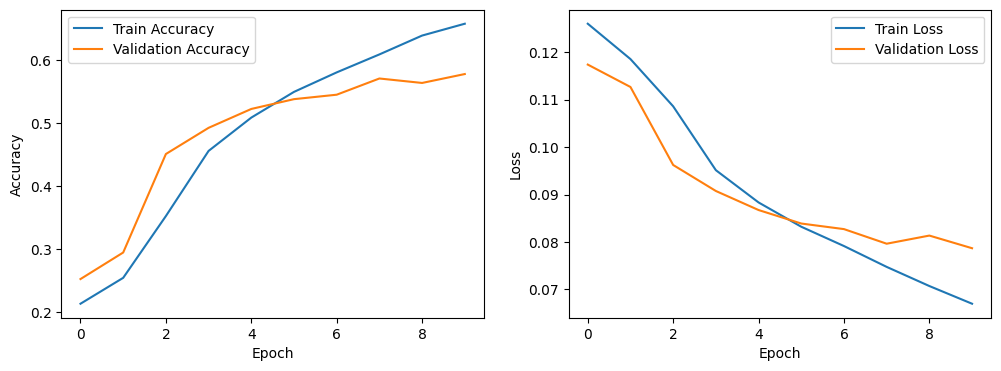

111/111 [==============================] - 5s 41ms/step - loss: 0.0800 - accuracy: 0.5732
Test Accuracy: 0.5731672644615173
111/111 [==============================] - 5s 41ms/step


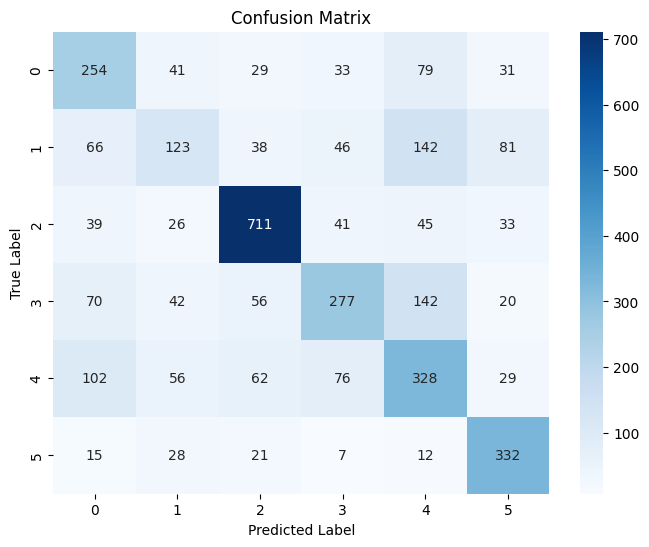

              precision    recall  f1-score   support

           0       0.47      0.54      0.50       467
           2       0.39      0.25      0.30       496
           3       0.78      0.79      0.78       895
           4       0.58      0.46      0.51       607
           5       0.44      0.50      0.47       653
           6       0.63      0.80      0.71       415

    accuracy                           0.57      3533
   macro avg       0.55      0.56      0.55      3533
weighted avg       0.57      0.57      0.56      3533

Best model selected based on highest test accuracy.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assuming you have the following variables: X_train, y_train, X_val, y_val, X_test, y_test

# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, 3, activation='relu', input_shape=(48, 48,3)))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D(2,2))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='sigmoid'))  # Binary classification

# Compile the model
learning_rate = 0.01
optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

# Set hyperparameters
batch_size_list = [128]
epochs_list = [10]
best_model = None
best_accuracy = 0.0

# Train the model for different hyperparameter settings
for batch_size in batch_size_list:
    for epochs in epochs_list:
        model = Sequential()

        # Convolutional layers
        model.add(Conv2D(32, 3, activation='relu', input_shape=(48, 48,3)))

        model.add(MaxPooling2D(2,2))
        model.add(Conv2D(64, 3, activation='relu'))
        model.add(MaxPooling2D(2,2))
        model.add(Conv2D(128, 3, activation='relu'))
        model.add(MaxPooling2D(2,2))
        model.add(Conv2D(256, 3, activation='relu'))
        model.add(MaxPooling2D(2,2))

        # Flatten layer
        model.add(Flatten())

        # Fully connected layers
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(7, activation='sigmoid'))  # Binary classification

        # Compile the model
        learning_rate = 0.001
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
        print(f"Training with batch size: {batch_size}, epochs: {epochs}")

        # Use ModelCheckpoint to save the best model based on validation accuracy
        checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

        # Train the model
        history =model.fit(X_train, y_train_one_hot, epochs=epochs, batch_size=batch_size,
        validation_data=(X_val, y_val_one_hot),callbacks=[checkpoint])

        # Plot training history
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
        print(f'Test Accuracy: {test_accuracy}')

        # Get predictions
        y_pred = np.argmax(model.predict(X_test), axis=1)

        # Create confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Display confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Display classification report
        print(classification_report(y_test, y_pred))

        # Check if the current model is the best
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model

# Use the best model for further analysis or deployment
print("Best model selected based on highest test accuracy.")


در عبارات بالا یک لایه دراپ قرار دادیم و به شکل عجیبی دقت ما در تست بیشتر شده و نزیدیک به 60 درصد شده استو برای داده ترین از 60 هم بیشتر شده است
که خوب انتظار آن هم میرفت با حذف کردن و دراپ تعداد پارامتر ها کمتر شوند و از اور فیتینگ جلو گیری کند و نتیجه بهتری داشته باشد.

روش های دیگر رگولاراسیون عبارتند از:

رگولاریزیشن L1 و L2:

رگولاریزیشن L1 (Lasso): جمع مقادیر مطلق وزن‌ها به تابع هزینه افزوده می‌شود. این تکنیک به sparse شدن وزن‌ها کمک می‌کند، به عبارت دیگر برخی از وزن‌ها دقیقاً صفر می‌شوند.
رگولاریزیشن L2 (Ridge): جمع مقادیر مربع وزن‌ها به تابع هزینه اضافه می‌شود. این تکنیک به کاهش وزن‌های بزرگ و تسهیل در دستیابی به یک مدل صاف کمک می‌کند

می‌توانید با تغییر پارامتر رگولاریزیشن (مثلاً 0.01 در مثال) ایجاد شده در مدل، قدرت رگولاریزیشن را تنظیم کنید.

Batch Normalization:

Batch Normalization ورودی یک لایه را با تنظیم و مقیاس دادن به فعالیت‌ها نرمال می‌کند. این تکنیک به پایدار کردن و شتاباندن فرآیند آموزش کمک می‌کند و به عنوان یک شکل از regularization عمل می‌کند.
این تکنیک با افزودن لایه‌های BatchNormalization پس از لایه‌های کانولوشنال یا لایه‌های کاملاً متصل اعمال می‌شود
Batch normalization به کاهش تغییرات داخلی متغیرها کمک می‌کند و فرآیند آموزش را پایدارتر می‌سازد.

Data Augmentation:

Data Augmentation یک تکنیک است که با اعمال تغییرات مختلف به داده‌های موجود، اندازه مجموعه داده را مصنوعی افزایش می‌دهد (مثلاً چرخش، انعکاس، بزرگنمایی).
این تکنیک به مدل کمک می‌کند تا مقاومت بهتری در برابر داده‌های ناشناخته داشته باشد